In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [14]:
img0 = cv2.imread("dataset-sirenlight/positive/sirenlight00000.png")
img1 = cv2.imread("dataset-sirenlight/positive/sirenlight00001.png")

img0_rgb = cv2.cvtColor(img0,cv2.COLOR_BGR2RGB)
img0_hsv = cv2.cvtColor(img0,cv2.COLOR_BGR2HSV)

img1_rgb = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img1_hsv = cv2.cvtColor(img1,cv2.COLOR_BGR2HSV)

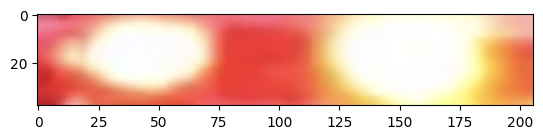

In [16]:
plt.imshow(img0_rgb)

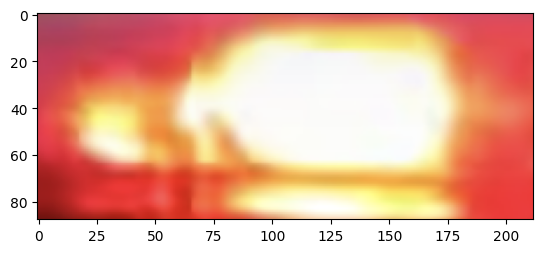

In [18]:
plt.imshow(img1_rgb)

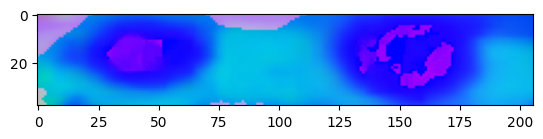

In [12]:
plt.imshow(img0_hsv)

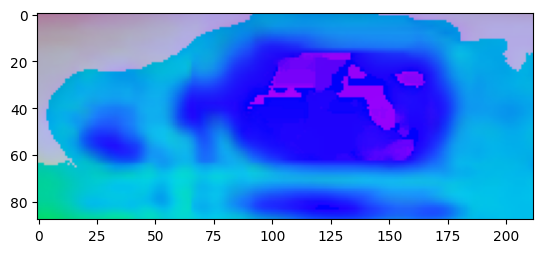

In [19]:
plt.imshow(img1_hsv)

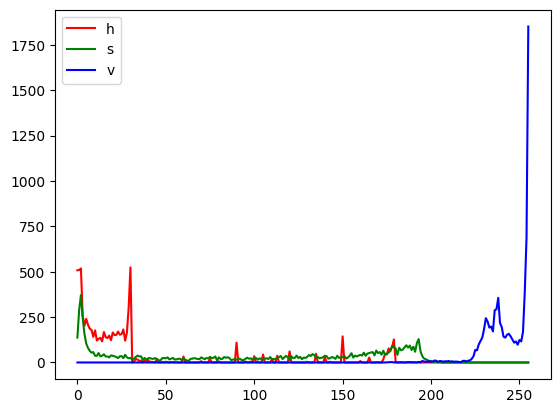

In [13]:
h, s, v = img0_hsv[:,:,0], img0_hsv[:,:,1], img0_hsv[:,:,2]
hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
plt.plot(hist_h, color='r', label="h")
plt.plot(hist_s, color='g', label="s")
plt.plot(hist_v, color='b', label="v")
plt.legend()
plt.show()

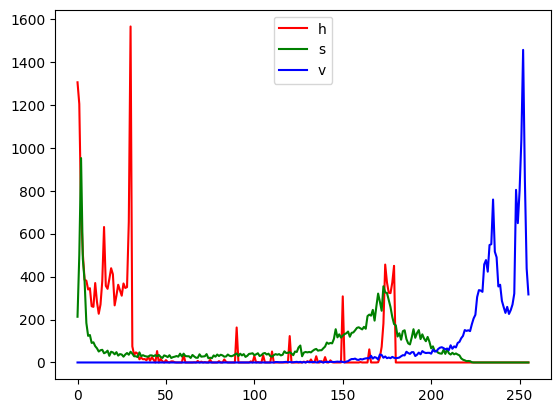

In [33]:
h, s, v = img1_hsv[:,:,0], img1_hsv[:,:,1], img1_hsv[:,:,2]
hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
plt.plot(hist_h, color='r', label="h")
plt.plot(hist_s, color='g', label="s")
plt.plot(hist_v, color='b', label="v")
plt.legend()
plt.show()

In [20]:
hist0 = cv2.calcHist([img0_hsv], [0,1], None, [180,256], [0,180,0, 256])
cv2.normalize(hist0, hist0, 0, 1, cv2.NORM_MINMAX)

hist1 = cv2.calcHist([img1_hsv], [0,1], None, [180,256], [0,180,0, 256])
cv2.normalize(hist1, hist1, 0, 1, cv2.NORM_MINMAX)

array([[0.5620053 , 0.1530343 , 0.17414248, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [32]:
ret = cv2.compareHist(hist0, hist1, cv2.HISTCMP_INTERSECT)
ret = ret/np.sum(hist0)
print(ret)

0.4085088923126624
